In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Fixing Regions
base = pd.read_csv("Intersecting_clean.csv")
regions = pd.read_csv("REGION.csv")
_reg = {}
for idx,row in regions.iterrows():
    _reg[row["name"]] = row["region"]
for idx,row in base.iterrows():
    _c = row["Country"]
    if _c in _reg:
        base.loc[idx,"Region"] = _reg[_c]
    else:
        print("Not Found: ",_c)
#Drop all countrys
base.drop(columns="Country",inplace=True)


['Security']:
   Features: 7
   Rows: 266
   Split: 0.6
   R2: 0.8447209125395089
   MSE: 0.16043955683715064
   Iters: 2500
   LRate: 0.2
 158
['Affordability']:
   Features: 7
   Rows: 266
   Split: 0.6
   R2: 0.8145535810706775
   MSE: 0.20098528521091924
   Iters: 2500
   LRate: 0.2
 119
['Avail']:
   Features: 7
   Rows: 266
   Split: 0.6
   R2: 0.6582712345200292
   MSE: 0.36866664423121626
   Iters: 2500
   LRate: 0.2
 121
['Quality']:
   Features: 7
   Rows: 266
   Split: 0.6
   R2: 0.7835512562042306
   MSE: 0.2323200729341632
   Iters: 2500
   LRate: 0.2
 61
['Sustain']:
   Features: 7
   Rows: 266
   Split: 0.6
   R2: 0.5913111103558047
   MSE: 0.4485537538695304
   Iters: 2500
   LRate: 0.2
 43


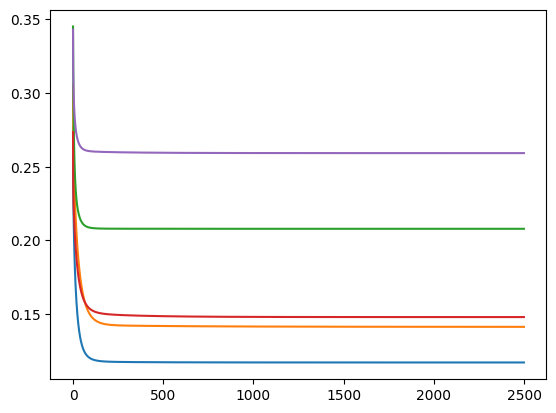

In [3]:
from MultiLinearReg import MultiLinear
rarr = {}
val = {}
targets = ['Security',"Affordability",'Avail','Quality','Sustain']
for target in targets:
    for n in range(200):
        try:
            mlr = MultiLinear(base,"Z")
            mlr.target=[target]
            mlr.features=[
            'gini',
            'exports',
            'imports',
            'pop',
            'gdppc',
            'Region',
            'median']
            res = mlr.create_model(n, 0.6,alpha=0.2)
            if n==0:
                rarr[target] = res
                val[target] = n
            if res.r2>rarr[target].r2:
                #print(res.r2, n)
                rarr[target] = res
                val[target] = n
        except:
            continue
    sns.lineplot(rarr[target].Jhist)
    print(rarr[target],val[target])



Empty DataFrame
Columns: [Security, Affordability, Avail, Quality, Sustain]
Index: []


<Axes: xlabel='variable', ylabel='value'>

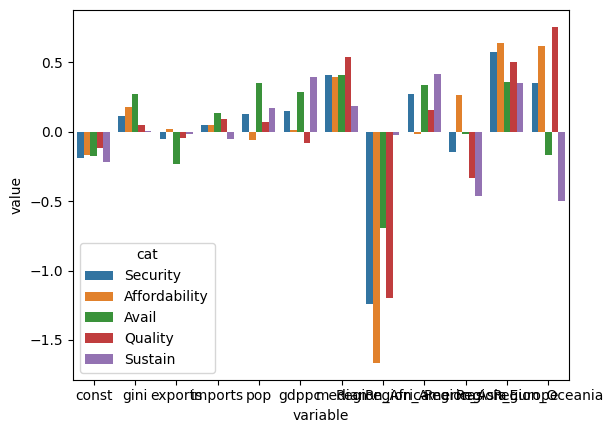

In [101]:
features = ['const']+ rarr['Security'].fl + ['cat']
betas = {feature:[] for feature in features}
normdata = {}
idxs = []
import json
import dataclasses
for k,v in rarr.items():    
    idxs.append(k)
    f = 0
    for vv in v.b.T.tolist()[-1]:
        betas[features[f]].append(vv)
        f+=1
    betas[features[-1]].append(k)
    f=0
    for kk,ndata in v.nd.items():
        if not k in normdata:
            normdata[k] = []
        fp = open(f'nd_{kk}.json','w')
        json.dump(dataclasses.asdict(ndata),fp)
        fp.close()
        #print(normdata[features[f]][-1])
        f+=1        
    #bp =sns.barplot(x=["const"]+v.fl,y=v.b.T.tolist()[-1],label=k)
    #bp.plot()
    
    #plt.show(block=False)
bdf = pd.DataFrame(betas)
bdf.to_csv("model.csv",index=False)
bdf = bdf.melt(id_vars=['cat'])
sns.barplot(data = bdf,x="variable",y="value",hue="cat")


In [142]:
from MultiLinearReg import *
import numpy as np
import os.path
class PredictorMLR():
    def __init__(self,model_f,tgt_variable_name='cat'):
        self.model = pd.read_csv(model_f)
        self.targets={}
        self.normdata = {}
        self.OHEdata = {}
        for k,row in self.model.iterrows():
            self.targets[row[tgt_variable_name]] = row.drop(tgt_variable_name)
        _tgt = self.targets[list(self.targets)[-1]]
        input_list = list(_tgt.to_dict().keys())
        for inp in input_list:
            if os.path.isfile(f'nd_{inp}.json'):
                fo = open(f'nd_{inp}.json','r')
                self.normdata[inp] = json.load(fo,object_hook=lambda d:NormalizationData(**d))
                fo.close()
            elif not inp == 'const':
                #it is probably OHE data check prefix:
                _pre = inp.split("_")
                if len(_pre)>1:
                    if not _pre[0] in self.OHEdata:
                        self.OHEdata[_pre[0]] = []
                    self.OHEdata[_pre[0]].append(_pre[1])
    def 
                        
                                        
        #print(self.targets)

In [143]:
pmlr = PredictorMLR("model.csv")

['const', 'gini', 'exports', 'imports', 'pop', 'gdppc', 'median', 'Region_Africa', 'Region_Americas', 'Region_Asia', 'Region_Europe', 'Region_Oceania']
